# CHAPTER 4
> FastBook Chapter 4 summary

- toc: true 
- badges: true
- comments: true
- categories: [fastbook]

> Note : I found this little one in front of my window. Suffering from foot deformity and can't fly. Now fully recovered and back his/her family.

<img alt="Our little Visitor" width="250" src="images/chapter-04/magpie.png"/>

In [259]:
#hide
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
# below is for disabling Jedi autocomplete that doesn't work well.
%config Completer.use_jedi = False


In [260]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')


## EXPLORING THE DATASET

### What untar does?

> Note: 'untar_data' come from fastai library, it downloads the data and untar it if it didn't already and returns the destination folder.

In [261]:
path = untar_data(URLs.MNIST_SAMPLE)

In [262]:
??untar_data

> Tip: Check it with '??'

### What is path ?

In [263]:
path

Path('.')

> Tip: what is inside the current folder? this where the jupyter notebook works. '!' at the beginning means the command works on the terminal.

### What is !ls ?

> Note: __ls works on the terminal. (-d for only listing directories)__

In [264]:
!ls

2020-02-20-test.ipynb	    ghtop_images  my_icons
2021-07-16-chapter-4.ipynb  images	  README.md


__can be used like this too.__

In [265]:
!ls /home/niyazi/.fastai/data/mnist_sample/train -d

/home/niyazi/.fastai/data/mnist_sample/train


__also like this:__

In [266]:
!ls /home/niyazi/.fastai/data/mnist_sample/train/3 -d

/home/niyazi/.fastai/data/mnist_sample/train/3


### What is tree ?

> Note: __for seeing tree sturucture of the files and folders (-d argument for directories)__

In [267]:
!tree /home/niyazi/.fastai/data/mnist_sample/ -d

/home/niyazi/.fastai/data/mnist_sample/
├── train
│   ├── 3
│   └── 7
└── valid
    ├── 3
    └── 7

6 directories


In [268]:
#hide
Path.BASE_PATH = path

### What is ls() ?

> Note: 'ls' is method by fastai similiar the Python's list fuction but more powerful.

In [269]:
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

> Note: Check this usage:

In [270]:
(path/'train')

Path('train')

In [271]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

> Note: there are  two folders under training folder

In [272]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()


> Note: this code returns and ordered list of paths

###  What is PIL ? (Python Image Library)

In [273]:
im3_path = threes[1]
im3 = Image.open(im3_path)
type(im3)
#im3

PIL.PngImagePlugin.PngImageFile

### NumPy array

The 4:10 indicates we requested the rows from index 4 (included) to 10 (not included) and the same for the columns. NumPy indexes from top to bottom and left to right, so this section is located in the top-left corner of the image. 

In [274]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

> Note: this is how it looks  some part of the image in the NumPy array

### Pytorch tensor

Here's the same thing as a PyTorch tensor:


In [275]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

> Note: It is possible to convert it to a tansor as well.

In [276]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('OrRd')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


## BASELINE: Pixel similarity

In [277]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

> Note: 'sevens' are still list of paths. 'o' is a path in the list, then with the list comprehension we use the path to read the image, then cast the image into tensor.(Same for threes). 'seven_tensor' is a list of tensors

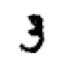

In [278]:
show_image(three_tensors[0]);

> Tip: Show image shows the first tensor as image

<AxesSubplot:>

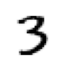

In [279]:
show_image(tensor(im3))

> Note: check this  in more straight way (im3>tensor>image) 

### Training Set:  Stacking Tensors

In [280]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [281]:
type(stacked_sevens)

torch.Tensor

In [282]:
type(stacked_sevens[0])

torch.Tensor

In [283]:
type(seven_tensors)

list

> Note: now we turn our list into a tensor size of ([6131, 28, 28])

In [284]:
len(stacked_threes.shape)

3

> Note: This is rank (lenght of the shape)

In [285]:
stacked_threes.ndim

3

> Note: This is more direct way to get it. (ndim)

### Mean of threes and sevens our ideal 3 and 7.

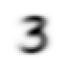

In [286]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

> Note: This is the mean of the all tensors through first axis. 'Ideal Three'

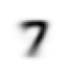

In [287]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

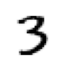

In [288]:
a_3 = stacked_threes[1]
show_image(a_3);

### Distance between the ideal three and other threes

In [289]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [290]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

> Note: Then we need to calculate the distance between the 'ideal' and ordinary three.Two methods for getting the distance __L1 Norm__ and __MSE__ second one is panelize bigger mistake more havil, L1 is uniform.

It is obvious that a_3 is closer to the perfect 3 so our approach worked at this time. (Both in L1 and MSE)

### Pytorch L1 and MSE fuctions

In [291]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

> Note: torch.nn.functional as F (for mse, manually take the sqrt)

> Important: (from notebook) If you don't know what C is, don't worry as you won't need it at all. In a nutshell, it's a low-level (low-level means more similar to the language that computers use internally) language that is very fast compared to Python. To take advantage of its speed while programming in Python, try to avoid as much as possible writing loops, and replace them by commands that work directly on arrays or tensors.

### Array and Tensor Examples

In [292]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [293]:
arr  # numpy

array([[1, 2, 3],
       [4, 5, 6]])

In [294]:
tns  # pytorch

tensor([[1, 2, 3],
        [4, 5, 6]])

#### Splitting, adding, multiplying tensors

In [295]:
tns[:,1]

tensor([2, 5])

In [296]:
tns[1,1:3]

tensor([5, 6])

In [297]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [298]:
tns.type()

'torch.LongTensor'

In [299]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

### Validation set :Stacking Tensors

In [300]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

### Manual L1 distance function

In [301]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

### This is broadcasting:

In [302]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1270, 0.1254, 0.1114,  ..., 0.1494, 0.1097, 0.1365]),
 torch.Size([1010]))

> Note:I think this an example of not using loops which slows down the process (check above important tag). Although shapes of the tensors don't match, out function still works. Pytorch fills the gaps.

__here is another example. Shapes don't match.__

In [303]:
tensor([1,2,3]) + tensor(1)

tensor([2, 3, 4])

In [304]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [305]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [306]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

#### here is an another broadcasting for all validation set:

In [307]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

### Accuracy of our 'ideal' 3 and 7

In [308]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

## STOCHASTIC GRADIENT DECENT (SGD)

__Arthur Samues Machine Learning process:__

- Initialize the weights.
- For each image, use these weights to predict whether it appears to be a 3 or a 7.
- Based on these predictions, calculate how good the model is (its loss).
- Calculate the gradient, which measures for each weight, how changing that weight would change the loss (SGD)
- Step (that is, change) all the weights based on that calculation.
- Go back to the step 2, and repeat the process.
- Iterate until you decide to stop the training process (for instance, because the model is good enough or you don't want to wait any longer).


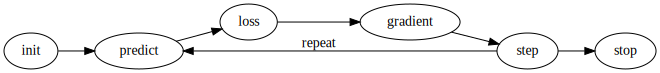

In [309]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

### GD example

In [310]:
def f(x): return x**2

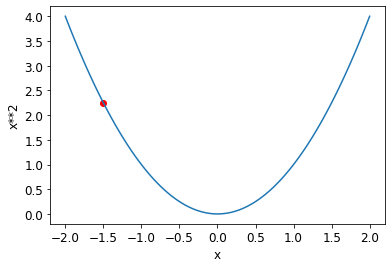

In [311]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

We need to decrease the loss

<img alt="A graph showing the squared function with the slope at one point" width="400" src="images/grad_illustration.svg"/>

### How to calculate gradient:

__Now our tensor xt is under investigation. Pytorch will keeps its eye on it.__

In [312]:
xt = tensor(3.).requires_grad_()

In [313]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

__Result is 9 but there is a grad function in the result.__
***

In [314]:
yt.backward()

__backward calculates the derivative.__

In [315]:
xt.grad

tensor(6.)

__result is 6.__
***

__now with a bigger tensor__

In [316]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [317]:
def f(x): return (x**2).sum()

In [318]:
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

__again we expect 2*xt:__

In [319]:
yt.backward()


In [320]:
xt.grad

tensor([ 6.,  8., 20.])

### End to end SGD example

In [321]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

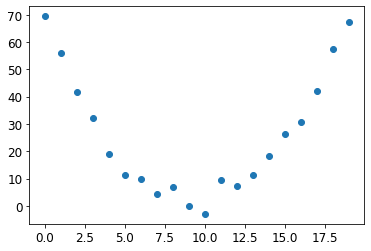

In [322]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed)

__Now we are trying to come up with some parameters for our quadratic fuction that predicts speed any given time. Our choice is quadratic but that could be something else too. with a quadratic function our problem would be much easier.__ 

__here is the function gets time and parameter as inputs and predicts a result:__

In [323]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

__this our loss function that calculate distance between prediction and target( actual mesurements)__

In [324]:
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

#### __Step 1: here are initial random parameters:__

In [325]:
params = torch.randn(3).requires_grad_()
params

tensor([ 0.9569,  0.0048, -0.1506], requires_grad=True)

In [326]:
#hide
orig_params = params.clone()

#### Step 2: calculate predictions:

In [327]:
preds = f(time,params)

In [328]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

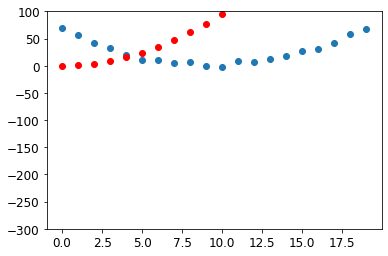

In [329]:
show_preds(preds)

#### Step 3: Calculate the loss

In [330]:
loss = mse(preds,speed)
loss

tensor(139.3082, grad_fn=<SqrtBackward>)

***
__The Question is how to improve these results:__

#### Step 4: first we calculate the gradient:

__Pytorch makes it easier we just call the backward() on the loss but it calculates gradient for the params 'a' 'b' and 'c'.___

In [331]:
loss.backward()
params.grad # this is the derivative of the initial values in other word our slope.

tensor([165.0324,  10.5991,   0.6615])

In [332]:
params.grad * 1e-5 # scaler at the end is learning rate.

tensor([1.6503e-03, 1.0599e-04, 6.6150e-06])

In [333]:
params # they are still same.

tensor([ 0.9569,  0.0048, -0.1506], requires_grad=True)

***
#### Step 5: Step the weight.

we picked the learning rate 1e-5 very small step to avoid missing the lowest possible loss.

In [334]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [335]:
preds = f(time,params)
mse(preds, speed)

tensor(139.0348, grad_fn=<SqrtBackward>)

lets create a function for all these steps

In [336]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

#### Step 6: repeat the step:

In [337]:
for i in range(10): apply_step(params)

139.03475952148438
138.76133728027344
138.4879150390625
138.2145538330078
137.94122314453125
137.6679229736328
137.39466857910156
137.12144470214844
136.84825134277344
136.5751190185547


In [338]:
#hide
params = orig_params.detach().requires_grad_()

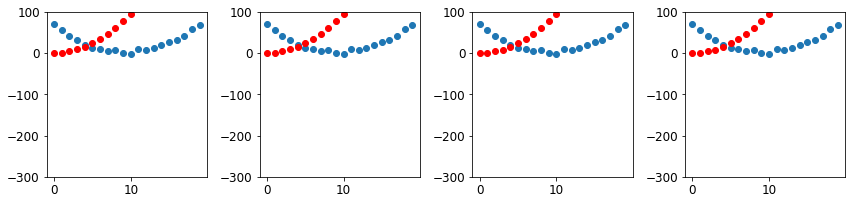

In [339]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

***
## MNIST

### Loss Function our 3 and 7 recognizer. Currently we use metric not loss

In [340]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [341]:
train_x.size()

torch.Size([12396, 784])

In [342]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

### How tensor manipulated 

In [343]:
temp_tensor = tensor (1)

In [344]:
temp_tensor

tensor(1)

In [345]:
type(temp_tensor)

torch.Tensor

__is above tensor is wrong what's the difference?__
***

__we have a tensor__

In [346]:
temp_tensor = tensor([1])

__then we multiuplied the inside of__

In [347]:
temp_tensor =tensor([1]*4)

In [348]:
temp_tensor

tensor([1, 1, 1, 1])

In [349]:
temp_tensor.shape

torch.Size([4])

In [350]:
temp_tensor.ndim

1

In [351]:
temp_tensor.size()

torch.Size([4])

In [352]:
(temp_tensor).unsqueeze(1)

tensor([[1],
        [1],
        [1],
        [1]])

> Warning: __looked changed but why size is still unchanged why not [4,1]__

In [353]:
temp_tensor.shape

torch.Size([4])

In [354]:
temp_tensor.size()

torch.Size([4])

### How unsqueeze works?

> Warning: Whaaaaaaaaaaaaat?

(temp_tensor).unsqueeze(1) doesn't work but (temp_tensor*1).unsqueeze(1) you need to unsqueeze it when creating otherwise it doesnt work. I do not believe it.

In [355]:
temp_tensor = tensor([1]).unsqueeze(1)

In [356]:
temp_tensor.shape

torch.Size([1, 1])

In [357]:
temp_tensor =tensor([1]*1).unsqueeze(1)

### Dataset

In [358]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,x.ndim,y

(torch.Size([784]), 1, tensor([1]))

__we create list of tuples, each tuple contains a image and a target__

In [359]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

__same for validation__
***

### Weights

__this is not clear on the videos but consider a layer NN of 728 inputs and 1 output.__

In [360]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [361]:
weights = init_params((28*28,1))

In [362]:
weights.shape

torch.Size([784, 1])

In [363]:
bias = init_params(1)

> Note: The function `weights*pixels` won't be flexible enough—it is always equal to 0 when the pixels are equal to 0 (i.e., its *intercept* is 0). You might remember from high school math that the formula for a line is `y=w*x+b`; we still need the `b`. We'll initialize it to a random number too:

In [364]:
bias

tensor([0.0959], requires_grad=True)

__Again transposing the weight matrix is not clear but Tariq Rashed's book would be very beneficial at this point__

In [365]:
(train_x[0]*weights.T).sum() + bias

tensor([-5.6867], grad_fn=<AddBackward0>)

__for all dataset put this multiplication in a function__

In [366]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ -5.6867],
        [ -6.5451],
        [ -2.0241],
        ...,
        [-14.3286],
        [  4.3505],
        [-12.6773]], grad_fn=<AddBackward0>)

__Create a tensor with results based on their value (above 0.5 is 7 and below it is 3)__

In [367]:
corrects = (preds>0.5).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [False],
        [ True]])

***
__check it__

In [368]:
corrects.float().mean().item()

0.4636172950267792

__almost half of them is 3 and the other half is 7 (since weighs are totally random)__ 
***

### Why we need a loss Function

__Basically we need to have gradients for correcting our weighs, we need to know which direction we need to go__ 


If you dont understand all of these, ckeck khan academy for gradient.

In [369]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [370]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [371]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [372]:
mnist_loss(prds,trgts)

tensor(0.4333)

### Sigmoid

__We need this for squishing predictions between 0-1__

In [373]:
def sigmoid(x): return 1/(1+torch.exp(-x))

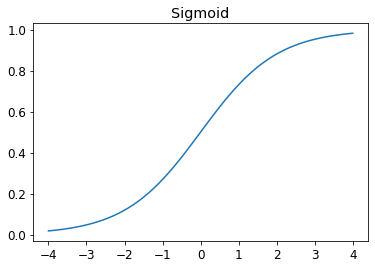

In [374]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

__update the fuction with the sigmoid thats all.__

In [375]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

### What are SGD and Mini-Batches

__This explains most of it.__

In [376]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 0,  2, 10, 13,  8]),
 tensor([11, 12,  4,  1,  5]),
 tensor([ 3, 14,  6,  9,  7])]

__but this is only a list however we neeed a tuple consist of independent and dependent variable.__

In [377]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

#### DataLoader

__then put it into a Dataloader.__

In [378]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([ 1, 23,  9,  8, 24,  2]), ('b', 'x', 'j', 'i', 'y', 'c')),
 (tensor([14, 25, 13, 11, 19,  5]), ('o', 'z', 'n', 'l', 't', 'f')),
 (tensor([ 0, 10,  4,  7, 18, 12]), ('a', 'k', 'e', 'h', 's', 'm')),
 (tensor([ 6, 21, 15, 16, 22,  3]), ('g', 'v', 'p', 'q', 'w', 'd')),
 (tensor([20, 17]), ('u', 'r'))]

__now we have batches and tuples__
***

__all together__

It's time to implement the process we saw in <<gradient_descent>>. In code, our process will be implemented something like this for each epoch:

```python
for x,y in dl:
    pred = model(x)
    loss = loss_func(pred, y)
    loss.backward()
    parameters -= parameters.grad * lr
```

In [379]:
weights = init_params((28*28,1))
bias = init_params(1)

In [380]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [381]:
valid_dl = DataLoader(valid_dset, batch_size=256)

__a small test__

In [382]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

***
__predictions__

In [383]:
preds = linear1(batch)
preds

tensor([[ 8.0575],
        [14.3841],
        [-3.8017],
        [ 5.1179]], grad_fn=<AddBackward0>)

__loss__

In [384]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.2461, grad_fn=<MeanBackward0>)

__gradients__

In [385]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0010), tensor([-0.0069]))

__for the step we need a optimizer__
***

__put all into a function except the optimizer.__

In [386]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [387]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0021), tensor([-0.0138]))

> Warning: if you do it twice results are change.

In [388]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0031), tensor([-0.0207]))

In [389]:
weights.grad.zero_()
bias.grad.zero_();

In [390]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

__little conversion to our results, it's important because we need to understand that what our model says about the numbers(three or not three)__

In [391]:
(preds>0.0).float() == train_y[:4]

tensor([[ True],
        [ True],
        [False],
        [ True]])

In [392]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

***
__this is training accuracy__

In [393]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.7500)

__this is for validation for all set__

In [394]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [395]:
validate_epoch(linear1)

0.5136

### Training

__one epochs of training__

In [396]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.7121

__then more__

In [397]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8656 0.9203 0.9457 0.9549 0.9593 0.9623 0.9652 0.9666 0.9681 0.9705 0.9706 0.9711 0.972 0.973 0.9735 0.9735 0.974 0.9745 0.9755 0.9755 

### Optimizer

__Let's start creating our model with Pytorch instead of our "linear1" function. Pytorch also creates parameters like our init_params function.__


In [398]:
linear_model = nn.Linear(28*28,1)

In [399]:
w,b = linear_model.parameters()

In [400]:
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

__Custom optimizer__

In [401]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [402]:
opt = BasicOptim(linear_model.parameters(), lr)

__new training fuction will be__

In [403]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [404]:
validate_epoch(linear_model)

0.4078

In [405]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [406]:
train_model(linear_model, 20)

0.4932 0.8193 0.8418 0.9136 0.9331 0.9477 0.9555 0.9629 0.9658 0.9673 0.9697 0.9717 0.9736 0.9751 0.9761 0.9761 0.9775 0.9775 0.9785 0.9785 

### Fastai's SDG class

__instead of using "BasicOptim" class we can use fastai's SGD class__

In [407]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.7808 0.8623 0.9185 0.9365 0.9521 0.9575 0.9638 0.9658 0.9678 0.9707 0.9726 0.9741 0.9751 0.9761 0.9765 0.9775 0.978 0.9785 0.9785 

__Just remove the "train_model" at this time and use fastai's "Learner.fit" Before using Learner first we need to pass our trainig and validation data into "Dataloaders" not "dataloader"__

#### Fastai's Dataloaders

In [408]:
dls = DataLoaders(dl, valid_dl)

In [409]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

#### FastAi's Fit

In [410]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637166,0.503575,0.495584,00:00
1,0.562232,0.139727,0.900393,00:00
2,0.204552,0.207935,0.806183,00:00
3,0.088904,0.114767,0.904809,00:00
4,0.046327,0.081602,0.930324,00:00
5,0.029754,0.064530,0.944553,00:00
6,0.022963,0.054135,0.954858,00:00
7,0.019966,0.047293,0.961236,00:00
8,0.018464,0.042515,0.965162,00:00
9,0.017573,0.039011,0.966634,00:00


### Adding a Nonlinearity

__The basic idea is that by using more linear layers, we can have our model do more computation, and therefore model more complex functions. But there's no point just putting one linear layer directly after another one, because when we multiply things together and then add them up multiple times, that could be replaced by multiplying different things together and adding them up just once! That is to say, a series of any number of linear layers in a row can be replaced with a single linear layer with a different set of parameters.__ (From Fastbook)

Amazingly enough, it can be mathematically proven that this little function can solve any computable problem to an arbitrarily high level of accuracy, if you can find the right parameters for w1 and w2 and if you make these matrices big enough. For any arbitrarily wiggly function, we can approximate it as a bunch of lines joined together; to make it closer to the wiggly function, we just have to use shorter lines. This is known as the __universal approximation theorem.___ The three lines of code that we have here are known as layers. The first and third are known as linear layers, and the second line of code is known variously as a nonlinearity, or activation function.(From Fastbook)

In [411]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [412]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [413]:
#hide_output
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.303284,0.398378,0.511776,00:00
1,0.142384,0.221517,0.817959,00:00
2,0.079702,0.112610,0.917076,00:00
3,0.052855,0.076474,0.942100,00:00
4,0.040301,0.059791,0.958783,00:00
5,0.033824,0.050389,0.964181,00:00
6,0.030075,0.044483,0.966143,00:00
7,0.027629,0.040465,0.966634,00:00
8,0.025865,0.037553,0.969578,00:00
9,0.024499,0.035336,0.971541,00:00


#### recorder is a fast ai method

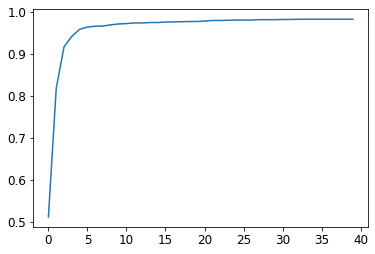

In [414]:
plt.plot(L(learn.recorder.values).itemgot(2));

__Last value__

In [415]:
learn.recorder.values[-1][2]

0.982826292514801

## GOING DEEPER

__why deeper if it is two and a nonlinear between them is enough__

We already know that a single nonlinearity with two linear layers is enough to approximate any function. So why would we use deeper models? The reason is performance. With a deeper model (that is, one with more layers) we do not need to use as many parameters; it turns out that we can use smaller matrices with more layers, and get better results than we would get with larger matrices, and few layers.

In [416]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.089727,0.011755,0.997056,00:13
